![Video games](Images\video_games.jpg)


# Background

The online gaming industry comprises various segments catering to different aspects of gaming experiences and player preferences, with video games being a prominent one. Video games are interactive electronic games played on a screen, featuring players controlling characters or objects to achieve objectives within a virtual environment. Examples include popular titles like Super Mario Bros, Minecraft, Call of Duty, and PlayerUnknown's Battlegrounds (PUBG).


Each year, thousands of new video games are developed and released across various platforms ranging from consoles and PCs to mobile devices and cloud-based gaming services and span a multitude of genres - action, adventure, strategy, just name it. With each year comes the expectation that these games become a buzz amongst gamers and in return revenue is generated. But a problem suffices with this.

# The problem

Due to the continuous advent and improvement of these video games, the industry witnesses fluctuations in sales and performace metrics. Stakeholders in the gaming industry are therefore left to face the challenge of accurately predicting sales performance and correctly classify games based on relevant variables, to boost sales and popularity amongst their target audience. How do we tackle this?

# Solution process

As a data scientist, my aim is to provide valuable insights to these stakholders enabling them make informed decisions regarding game development, marketing strategies and platform selection therefore enhancing the success of video game products in the market. How do I achieve this?

Being provided with historical data, my goal is to predict the sales performance of video games worldwide, classify video games that are most likely to turn in high sales, and answer specific questions related to the data. 

# About the data

The dataset contains information about video game sales worldwide, including factors such as critic and user reviews, genre, platform, and more. Note that sales is in millions.

| Column Name      | Description                                            |
|------------------|--------------------------------------------------------|
| Name             | The name of the video game.                            |
| Platform         | The platform on which the game was released.           |
| Year_of_Release  | The year in which the game was released.               |
| Genre            | The genre of the video game.                           |
| Publisher        | The company responsible for publishing the game.       |
| NA_Sales         | The sales of the game in North America.                |
| EU_Sales         | The sales of the game in Europe.                       |
| JP_Sales         | The sales of the game in Japan.                        |
| Other_Sales      | The sales of the game in other regions.                |
| Global_Sales     | The total sales of the game across the world.          |
| Critic_Score     | The average score given to the game by professional critics. |
| Critic_Count     | The number of critics who reviewed the game.           |
| User_Score       | The average score given to the game by users.          |
| User_Count       | The number of users who reviewed the game.             |
| Developer        | The company responsible for developing the game.       |
| Rating           | The rating of the game.                                |



# Domain knowledge

### 1. Ratings
In the video game sales dataset, the ratings represent the age and content suitability as determined by the Entertainment Software Rating Board (ESRB).


| Rating | Meaning                                                                                                                                           |
|--------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| E      | Everyone - Suitable for all ages. Content generally suitable for ages 6 and older. |
| M      | Mature - Suitable for ages 17 and older.|
| T      | Teen - Suitable for ages 13 and older. |
| E10+   | Everyone 10 and older - Suitable for ages 10 and older.|
| K-A    | Kids to Adults - Older rating used prior to 1997, now replaced by "E (Everyone)".|
| AO     | Adults Only - Suitable for ages 18 and older.|
| EC     | Early Childhood - Suitable for young children.|
| RP     | Rating Pending - Assigned to titles awaiting final ESRB rating|



### 2. Publisher
A publisher is a company or entity responsible for bringing the game to the market and distributing it to retail stores and digital platforms.

### 3. Developer
Refers to the company or group of individuals responsibile for creating and producing the game.

### 4. Platform
This is the specific hardware or software environment in which the game is released and playable. They include consoles (e.g Playstation, Xbox), handheld devices(e.g, Nintendo DS), personal computers (e.g., windows, Mac) and mobile devices (e.g iOS, Android). This determines the audience and accessibility of the game.

## Data preparation

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
video_games = pd.read_csv('Data/Video_Games.csv')
games = video_games.copy()

games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


This provides information on the number of entries and variables, the kind of data structure - a dataframe in this case, the distribution of the data types between float64 and object and the RAM usage.

In [6]:
#formatting column names and stripping white spaces

games.columns = games.columns.str.lower().str.strip()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

In [7]:
#checking for duplicate values/rows

duplicate_rows = games.duplicated()
print(games[duplicate_rows])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, publisher, na_sales, eu_sales, jp_sales, other_sales, global_sales, critic_score, critic_count, user_score, user_count, developer, rating]
Index: []


It returns an empty dataframe, which means that there are no duplicate rows.

In [8]:
#to get a better view of the null values present

games.isna().sum().sort_values(ascending = False)

user_count         9129
critic_score       8582
critic_count       8582
rating             6769
user_score         6704
developer          6623
year_of_release     269
publisher            54
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
dtype: int64

The user_count column contains the most null values.

In [9]:
#to get a view of the data types

games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score          object
user_count         float64
developer           object
rating              object
dtype: object

I observed the following:

- `year_of_release` is in float data type instead of date/object. However, it contains null values(N/A). If we convert this column to a object data type. It would convert these null(N/A) rows to object and the null values disappears. This would give the illusion of the absence of null values.

- `user_score` is formatted as an object instead of float. This can be converted.

In [10]:
games['user_score'] = games['user_score'].astype(float)

games.dtypes

ValueError: could not convert string to float: 'tbd'

Based on this error I discovered that the user_score contained **'tbd' (meaning 'to be decided'**) values that prevented the conversion of the user_score column from object to float.

In [11]:
games['user_score'].value_counts()

user_score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

There are over 2,000 entries with user_score as 'tbd'. To tackle this I replaced these values with null/nan values.

In [12]:
#to get rid of any white spaces that may be present
games['user_score'] = games['user_score'].str.strip()

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'].value_counts()

user_score
7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: count, Length: 95, dtype: int64

We have gotten rid of the "tbd" values.

In [13]:
#performing the datatype conversion again

games['user_score'] = games['user_score'].astype(float)

games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
dtype: object

In [14]:
#reviewing the number of nulls again

games.isna().sum().sort_values(ascending = False)

user_score         9129
user_count         9129
critic_score       8582
critic_count       8582
rating             6769
developer          6623
year_of_release     269
publisher            54
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
dtype: int64

In [15]:
#To gain insights into the extent of these missing values across different variables

round((games.isnull().sum()/len(games))*100, 2).sort_values(ascending=False)

user_score         54.60
user_count         54.60
critic_score       51.33
critic_count       51.33
rating             40.49
developer          39.61
year_of_release     1.61
publisher           0.32
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
global_sales        0.00
dtype: float64

The user_count and user_score columns have the most null values.

## Tackling null or missing values

1. The name and genre columns have negligible null value cases and therefore the affected rows can be removed. 

2. The remaining columns have a sizeable chunk of null values that if dropped can impact my analysis.

### 1. Get rid of the missing values in the name and genre rows

`Type of missing data: Missing Completely at Random(MCAR)`

Here,the data is missing completely at random. It means that the probability of a data point missing is entirely unrelated to any other observed/unobserved data. The name and genre columns fall into this category.

In [16]:
#let's see the rows containing null values for the name and genre columns
games[games['name'].isnull() | games['genre'].isnull()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
games = games.dropna(subset=['name', 'genre'])
games.isna().sum().sort_values(ascending = False)

user_score         9127
user_count         9127
critic_score       8580
critic_count       8580
rating             6767
developer          6621
year_of_release     269
publisher            54
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
dtype: int64

### 2. For the categorical columns, replace the NaN values with "missing"

In [18]:
#replace the nan values with "missing"

games[['rating','developer', 'publisher']] = games[['rating','developer', 'publisher']].fillna('missing')
games.isna().sum().sort_values(ascending = False)

user_score         9127
user_count         9127
critic_score       8580
critic_count       8580
year_of_release     269
name                  0
platform              0
genre                 0
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
developer             0
rating                0
dtype: int64

### 3. Missing values in the numerical columns

`Type of missing data: Missing at Random(MAR)`

Here, the probability of a data point missing depends on the observed data.

What does this mean for this data? This means that the missingness of values in columns such as user_score, user_count, critic_score, critic_count, rating, year_of_release, developer, and publisher, is related to other observed data within the dataset. For example, the missing values might depend on variables like the genre of the game, the release year, or the platform. The missing data is not completely random, but can be explained by some other known information. 

These rows cannot dropped as that will lead to gross information loss thereby impacting the efficiency of our model. These values can be tackled using a variety of methods e.g KNNImputer, Iterative Imputer, etc. Here I used a a multiavariate approach - the KNNImputer with k=5 nearest neighbours which allows the imputer to find the 5 most similar rows in the dataset and make imputations for each.

In [19]:
%%time
#imputing missing values for numerical columns

from sklearn.impute import KNNImputer

knn_imputer=KNNImputer(n_neighbors=5)
games[['user_score','user_count','critic_score', 'critic_count', 'year_of_release']] = knn_imputer.fit_transform(games[['user_score','user_count','critic_score', 'critic_count', 'year_of_release']])
games.head()

Wall time: 38 s


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,missing,missing
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,missing,missing


In [20]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
critic_score       0
critic_count       0
user_score         0
user_count         0
developer          0
rating             0
dtype: int64

**All null values have been taken care of.**

## Feature engineering

I created a new feature called release_era that groups the release year of games into three eras - pre-2000s, 2000-2010, and post-2010.

In [21]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [22]:
games['year_of_release'].value_counts().sort_index()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     483
2002     831
2003     780
2004     773
2005     954
2006    1140
2007    1221
2008    1447
2009    1446
2010    1264
2011    1155
2012     657
2013     549
2014     581
2015     606
2016     502
2017       3
2020       1
Name: count, dtype: int64

Looking at the results of the value counts above, we observe that 2017 and 2020 had the least number of games released. There is also a gap of two years between 2017 and 2020. We can filter the data to contain games released between 1980 and 2016 to give us a more complete timeline to work with.

In [23]:
games = games[games['year_of_release']<=2016]
games['year_of_release'].value_counts().sort_index()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     483
2002     831
2003     780
2004     773
2005     954
2006    1140
2007    1221
2008    1447
2009    1446
2010    1264
2011    1155
2012     657
2013     549
2014     581
2015     606
2016     502
Name: count, dtype: int64

In [24]:
def get_era(year):
    if year < 2000:
        return 'pre-2000s'
    elif 2000 <= year <= 2010:
        return '2000-2010'
    else:
        return 'post-2010'
    
games['release_era'] = games['year_of_release'].apply(get_era)
games.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Nintendo,E,2000-2010
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Nintendo,E,2000-2010
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Nintendo,E,2000-2010
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


In [25]:
games.dtypes

name                object
platform            object
year_of_release      int32
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
release_era         object
dtype: object

In [26]:
games.select_dtypes(include=['object']).describe()

,name,platform,genre,publisher,developer,rating,release_era
count,16713,16713,16713,16713,16713,16713,16713
unique,11559,31,12,582,1697,9,3
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,missing,missing,2000-2010
freq,12,2161,3369,1356,6618,6764,10689


The platform, publisher and developer features have high number of unique categories which will lead to high dimensionality during the machine learning/regression tasks. Based on this, we can reduce the categories by grouping smaller categories together.

In [27]:
#selecting the most relevant publisher categories
top_publishers = games['publisher'].value_counts().nlargest(9).index

games['publisher'] = games['publisher'].apply(lambda x: x if x in top_publishers else 'Others')
games['publisher'].value_counts()

publisher
Others                          8923
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          932
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             636
Name: count, dtype: int64

In [28]:
#we have so many categories, in the developer column, so we narrow it down based on the frequency of each one present

#selecting the most relevant developer categories
top_developers = games['developer'].value_counts().nlargest(9).index

games['developer'] = games['developer'].apply(lambda x: x if x in top_developers else 'Others')

games['developer'].value_counts()

developer
Others              8939
missing             6618
Ubisoft              203
EA Sports            172
EA Canada            167
Konami               162
Capcom               139
EA Tiburon           108
Electronic Arts      104
Ubisoft Montreal     101
Name: count, dtype: int64

In [29]:
top_platform = games['platform'].value_counts().nlargest(9).index

games['platform'] = games['platform'].apply(lambda x: x if x in top_platform else 'Others')

games['platform'].value_counts()

platform
Others    4284
PS2       2161
DS        2151
PS3       1331
Wii       1320
X360      1262
PSP       1209
PS        1197
PC         974
XB         824
Name: count, dtype: int64

In [30]:
## saving the cleaned version of the data

games.to_csv('Data/cleaned_df', index=False)

In [31]:
#reading the cleaned data for exploratory data analysis
games2 = pd.read_csv('Data/cleaned_df')
games2.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Others,E,2000-2010
1,Super Mario Bros.,Others,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Pokemon Red/Pokemon Blue,Others,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


## Exploratory Data Analysis

### Univariate analysis

In [32]:
#univariate analysis on the categorical columns
games2.describe(include=['object'])

,name,platform,genre,publisher,developer,rating,release_era
count,16713,16713,16713,16713,16713,16713,16713
unique,11559,10,12,10,10,9,3
top,Need for Speed: Most Wanted,Others,Action,Others,Others,missing,2000-2010
freq,12,4284,3369,8923,8939,6764,10689


In [33]:
cat_df = games2[['platform', 'release_era', 'genre', 'publisher', 'developer', 'rating']]

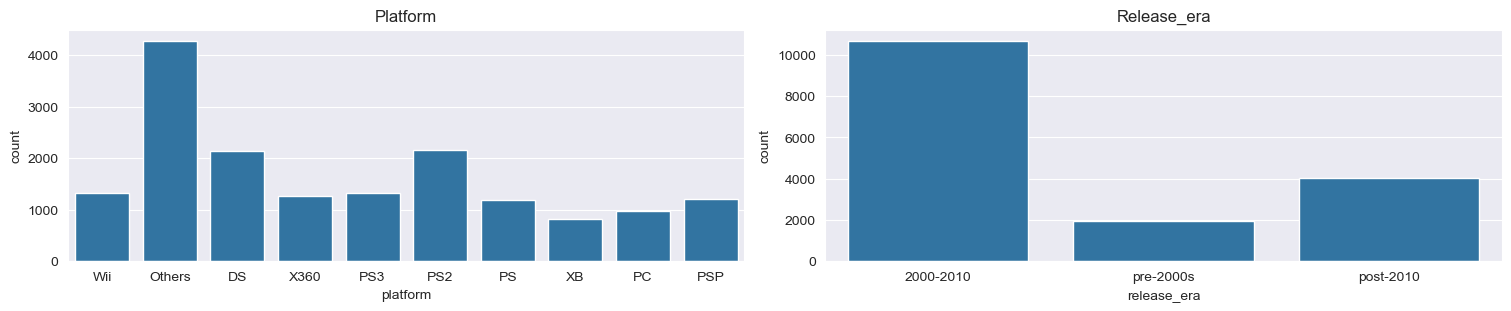

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15, 3), layout = 'constrained')

axs[0].set_title('Platform')
sns.countplot(data=cat_df, x='platform', ax=axs[0])

axs[1].set_title('Release_era')
sns.countplot(data=cat_df, x='release_era', ax=axs[1])
plt.show()

The 2000-2010 release era had the most number of games with the pre-2000s having the least number of games released. 
The PS2 platform was the most used platform for game release through the years, following the Others category.

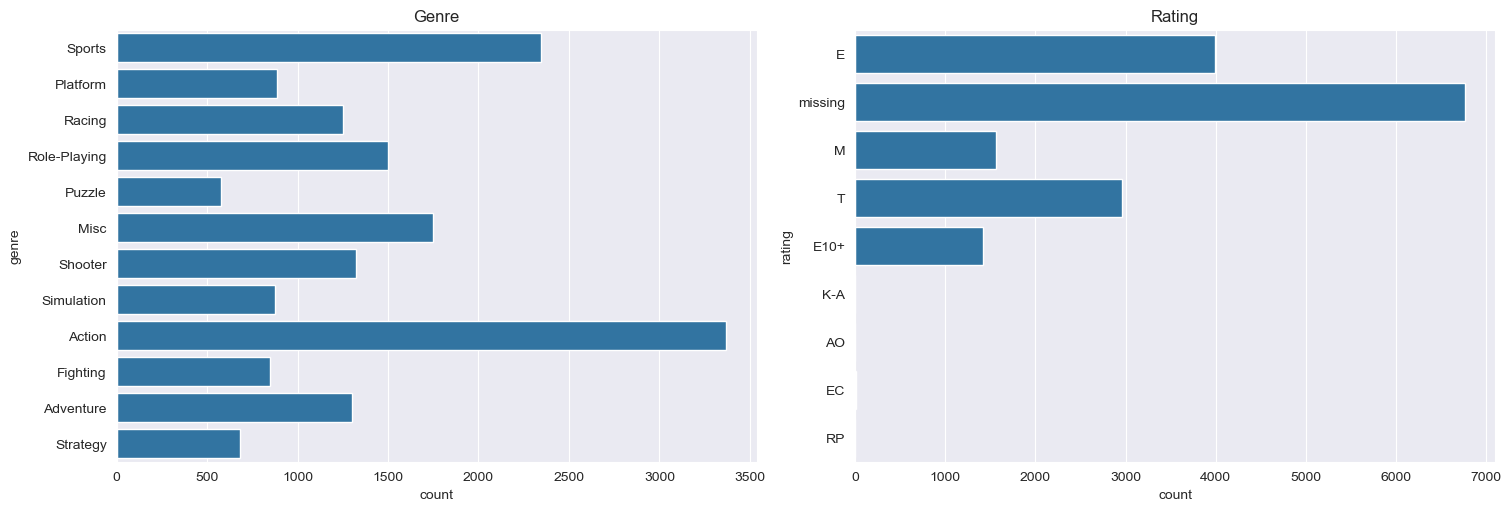

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), layout = 'constrained')

axs[0].set_title('Genre')
sns.countplot(data=cat_df, y='genre', ax=axs[0])

axs[1].set_title('Rating')
sns.countplot(data=cat_df, y='rating', ax=axs[1])
plt.show()

Most games released through the decades were Action based games followed by the Sports category. However, puzzle video games had the least number of videos games in all. For the game ratings, asides from the large number of games with no ratings, most games released were in the **'E': Everyone** labeled category while the K-A, AO, EC, and RP categories have the least games released between 1980 and 2016. This provides insight into the genre of games most popular through the years. 

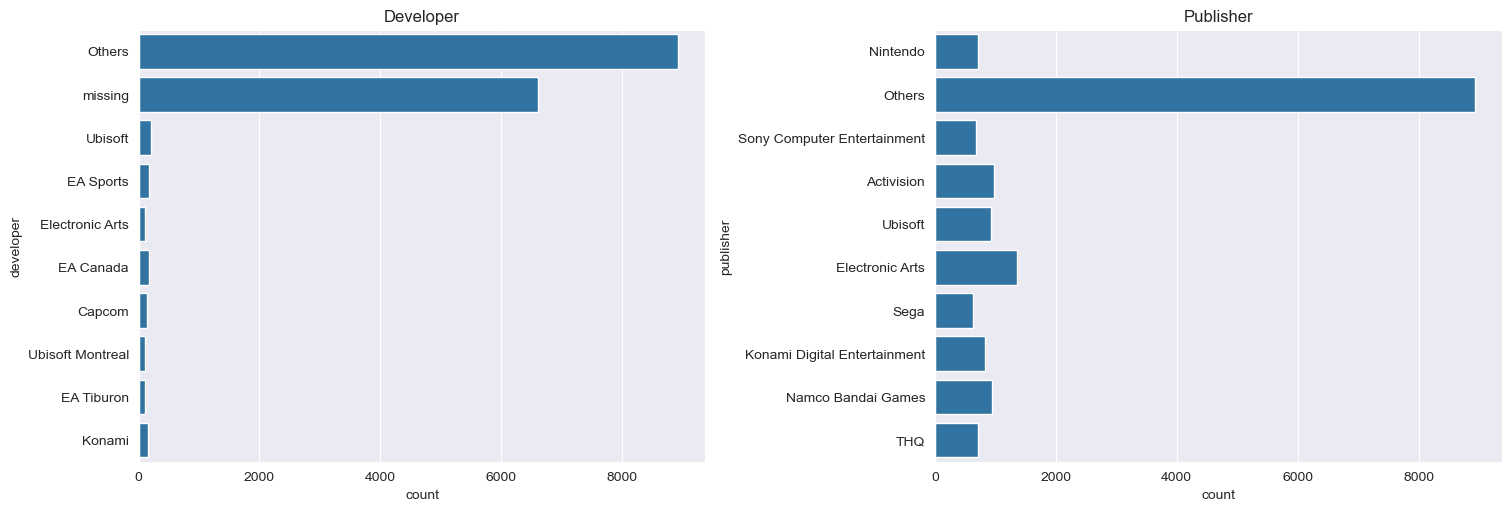

In [37]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), layout = 'constrained')

axs[0].set_title('Developer')
sns.countplot(data=cat_df, y='developer', ax=axs[0])

axs[1].set_title('Publisher')
sns.countplot(data=cat_df, y='publisher', ax=axs[1])

plt.show()

From the plot we can understand the developers and publishers who have released the most games. Amongst the developers, Ubisoft has developed the most games while Electronic Arts has published the most games. It also gives us an idea of the most popular publishers and developers through the decades we can leverage on to release a new game.

In [38]:
#univariate analysis on the numerical columns
num_df = games2.select_dtypes(include=['number'])
num_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.493329,0.263302,0.145045,0.077625,0.047343,0.533568,71.198493,24.557533,7.255222,189.098075
std,5.834581,0.813565,0.503359,0.308871,0.186742,1.548125,11.677788,15.003701,1.147303,437.080567
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,65.000000,13.200000,6.740000,17.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,70.800000,24.000000,7.340000,43.400000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,80.000000,31.400000,7.900000,221.800000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


This returns a descriptive statistics for the numerical columns. It shows the average, range and quantiles for each column.

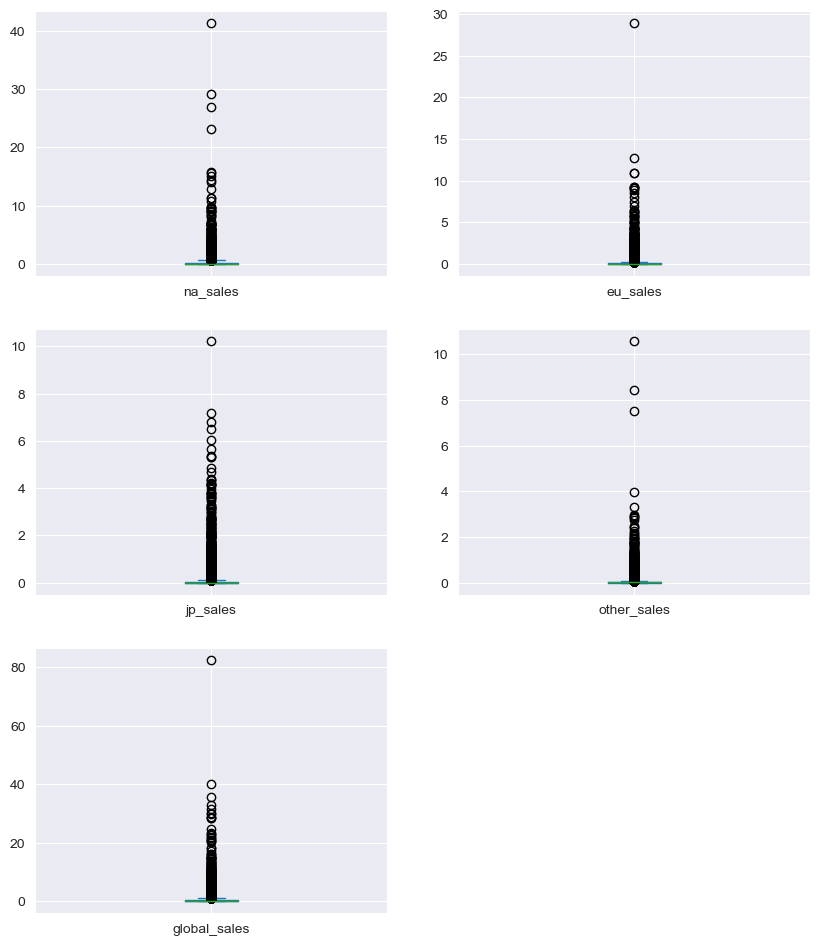

In [39]:
num1 = num_df[['na_sales', 'eu_sales','jp_sales','other_sales','global_sales']]

num1.plot(kind='box', subplots=True, layout=(5,2), figsize=(10, 20))
plt.show()

The chart for sales across the regions and globally, shows that the distribution is skewed. In the real sense, it implies that there have been cases where the amount of sales in these regions were on the high side hence the outliers.

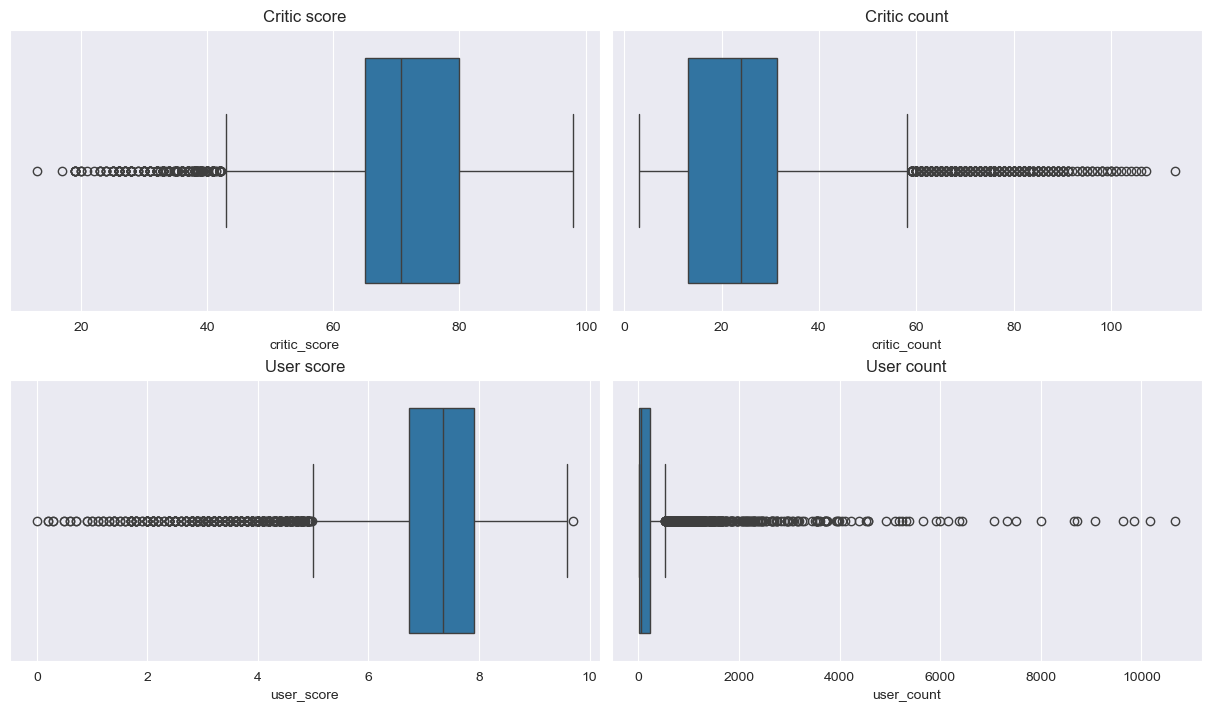

In [40]:
num2 = num_df[['critic_score','critic_count','user_score','user_count']]

fig, axs = plt.subplots(2,2, figsize=(12,7), constrained_layout=True)

axs[0,0].set_title('Critic score')
sns.boxplot(data=num2, x='critic_score', ax=axs[0,0])

axs[0,1].set_title('Critic count')
sns.boxplot(data=num2, x='critic_count', ax=axs[0,1])

axs[1,0].set_title('User score')
sns.boxplot(data=num2, x='user_score', ax=axs[1,0])

axs[1,1].set_title('User count')
sns.boxplot(data=num2, x='user_count', ax=axs[1,1])

plt.show()

**Observations:**

The critic and user evaluations provide insights into the reception of the games by both professional reviewers and general players.

- **Critic score**

This score represents the aggregated evaluation from various professional game reviewers and critics. It helps to provide a general sense of the game's quality from a professional perspective. It is negatively skewed indicating that some games received low scores from critics. Also the wide spread of the data as seen from the boxplot shows that most games are rated high by the critics. The critic score also ranged from 0 to 100.

- **User score**

It's distribution shows that the majority of users are very satified with the game. There are also a number of users who have given significantly lower scores which we can consider as outliers. Applying domain knowledge, these outlier values are not outliers in true sense, rather they represent real world cases where users do actually leave a low score behind due to bad user experiences or other issues encountered. The range here is between 0 to 10.

- **Critic count**

Shows how many different critics have reviewed the game. We can also observe that the data is right skewed indicating high critic counts which indicate a broader consenus or more widespread among professionals.

- **User count**

This count reflects how many individuals play the game. The boxplot shows us that there are few games with fewer user counts and its right skewedness shows a higher user count and therefore a larger player base and greater engagement from the gaming community. We also deduce that a game can have a huge player base, yet not everyone in that base drops a review (user score).

## Bivariate analysis

In [41]:
num_df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
year_of_release,1.000000,-0.091995,0.003984,-0.168352,0.037748,-0.076099,-0.212977,0.282065,-0.288164,-0.156388
na_sales,-0.091995,1.000000,0.765341,0.449668,0.638695,0.941014,0.150539,0.199007,0.049896,0.215163
eu_sales,0.003984,0.765341,1.000000,0.435079,0.722796,0.901237,0.149015,0.216494,0.041956,0.222590
jp_sales,-0.168352,0.449668,0.435079,1.000000,0.291090,0.612341,0.143013,0.070606,0.082079,0.131900
other_sales,0.037748,0.638695,0.722796,0.291090,1.000000,0.749258,0.120672,0.217252,0.031354,0.187617
global_sales,-0.076099,0.941014,0.901237,0.612341,0.749258,1.000000,0.170587,0.215187,0.059973,0.234335
critic_score,-0.212977,0.150539,0.149015,0.143013,0.120672,0.170587,1.000000,0.218242,0.533124,0.323919
critic_count,0.282065,0.199007,0.216494,0.070606,0.217252,0.215187,0.218242,1.000000,0.066296,0.269669
user_score,-0.288164,0.049896,0.041956,0.082079,0.031354,0.059973,0.533124,0.066296,1.000000,0.045930
user_count,-0.156388,0.215163,0.222590,0.131900,0.187617,0.234335,0.323919,0.269669,0.045930,1.000000


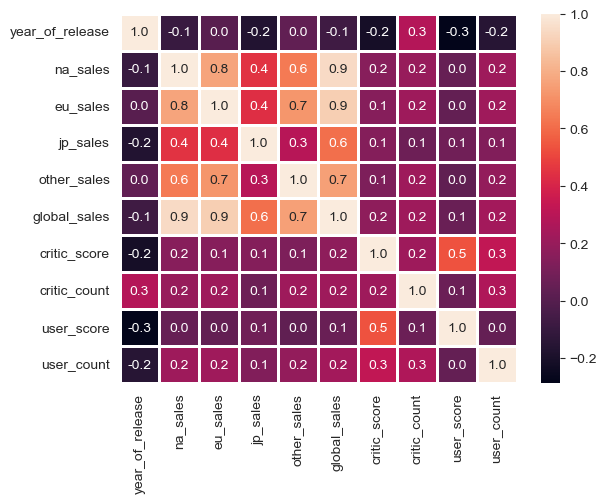

In [42]:
sns.heatmap(data=num_df.corr(), annot = True, fmt ='0.1f', linewidths=0.8)
plt.show()

### 1. What percentage of the sales does the respective categories contribute?

There is a strong positive correlation between the sales in the respective regions and the global sales. We can investigate this further to see how much each of these regions contribute to the global sales.

In [43]:
num_df['na_pct'] = (num_df['na_sales']/num_df['global_sales']) * 100
num_df['eu_pct'] = (num_df['eu_sales']/num_df['global_sales']) * 100
num_df['jp_pct'] = (num_df['jp_sales']/num_df['global_sales']) * 100
num_df['other_pct'] = (num_df['other_sales']/num_df['global_sales']) * 100
num_df.head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,na_pct,eu_pct,jp_pct,other_pct
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,50.115110,35.090270,4.568036,10.238701
1,1985,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,72.266402,8.896620,16.923459,1.913519
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,44.144144,35.923423,10.670045,9.262387
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,47.635032,33.353677,10.009155,9.002136
4,1996,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,35.926044,28.339178,32.578897,3.187759


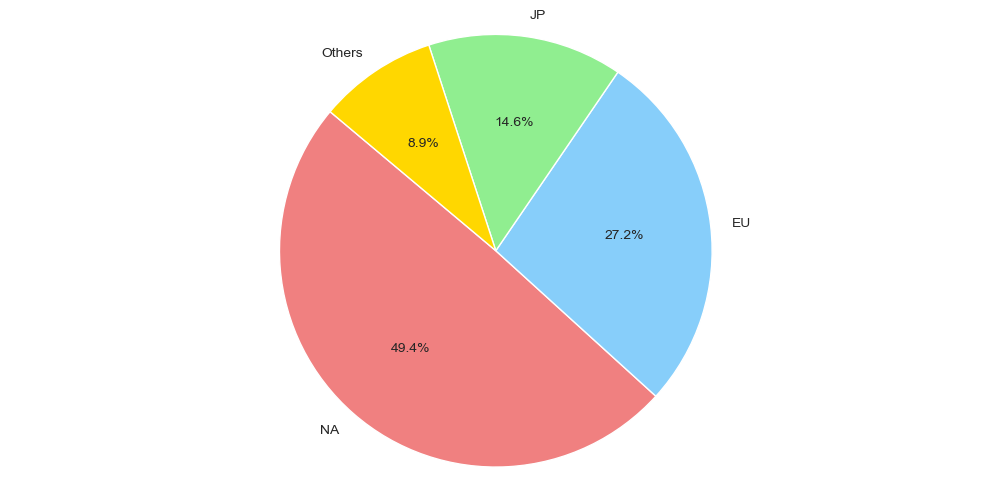

In [44]:
total_na_pct = num_df['na_sales'].sum() / num_df['global_sales'].sum() * 100
total_eu_pct = num_df['eu_sales'].sum() / num_df['global_sales'].sum() * 100
total_jp_pct = num_df['jp_sales'].sum() / num_df['global_sales'].sum() * 100
total_other_pct = num_df['other_sales'].sum() / num_df['global_sales'].sum() * 100

labels = ['NA', 'EU', 'JP', 'Others']
sizes = [total_na_pct, total_eu_pct, total_jp_pct, total_other_pct]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']

plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.tight_layout()
plt.show()

North America represents a major player in driving global sales. We can see that it contributes close to 50% of the global sales followed by Europe and Japan. "Other" regions bring up the rear. 

### 2. What has the sales through the years being like regionally?

In [45]:
#first group the data

sales_by_year = num_df.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_year = sales_by_year.reset_index()
sales_by_year.head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70


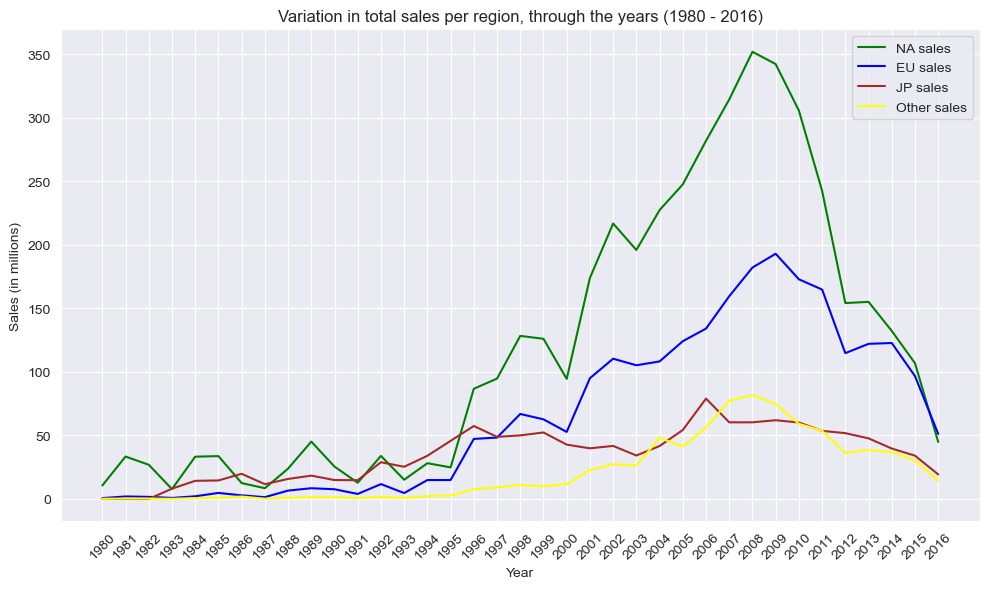

In [46]:
plt.figure(figsize=(10, 6))

#plotting the lines
plt.plot(sales_by_year['year_of_release'], sales_by_year['na_sales'], color='green', linestyle='-', label='NA sales')
plt.plot(sales_by_year['year_of_release'], sales_by_year['eu_sales'], color='blue', linestyle='-', label='EU sales')
plt.plot(sales_by_year['year_of_release'], sales_by_year['jp_sales'], color='brown', linestyle='-', label='JP sales')
plt.plot(sales_by_year['year_of_release'], sales_by_year['other_sales'], color='yellow', linestyle='-', label='Other sales')

plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Variation in total sales per region, through the years (1980 - 2016)')
plt.legend()

years = range(1980, 2017)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

Generally, sales spiked for all regions in 1995.

In North America there was a wave of flunctuations from 1980 till 1995 when it picked up and rose steadily with a few dips here and there. This reached peak sales of 350 million copies. This was not sustained though, the sales began dwindling through the years till 2016. The sales in all regions was low compared to a decade before that. Sales in Europe and Japan follow similar pattern.

For sales in "other" regions, we see a relative steady growth from less than one million sales to its highest point around 70 million and then a decline.

### 3. How have video game sales globally changed over time?

In [47]:
#calculating the sum
total_by_year = num_df.groupby('year_of_release')[['global_sales']].sum().reset_index()
total_by_year = total_by_year.rename(columns={'global_sales': 'total_sales'})

total_by_year.head()

,year_of_release,total_sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


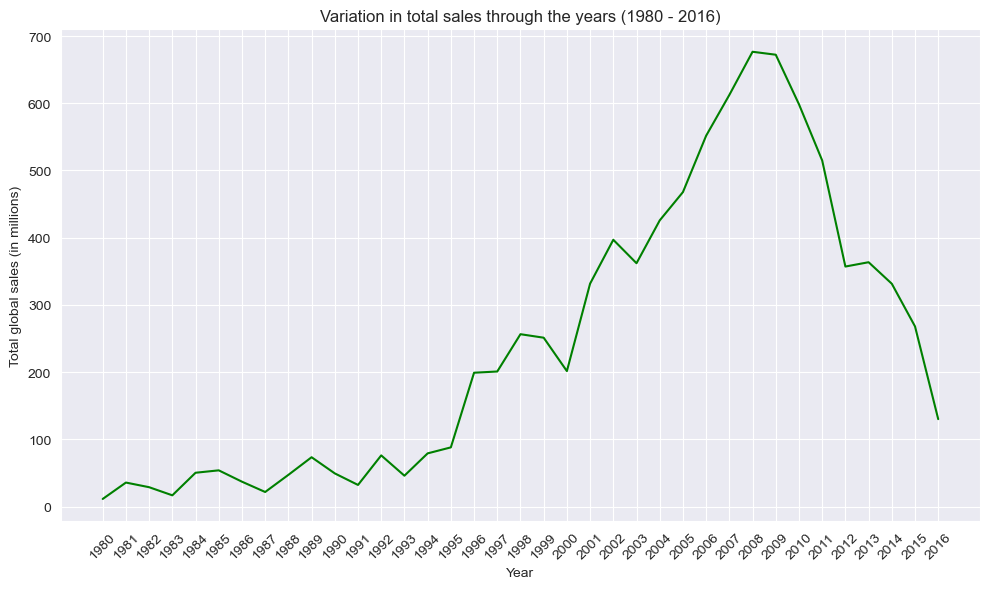

In [48]:
plt.figure(figsize=(10, 6))

#plotting the lines
plt.plot(total_by_year['year_of_release'], total_by_year['total_sales'], linestyle='-', color = 'green')

plt.xlabel('Year')
plt.ylabel('Total global sales (in millions)')
plt.title('Variation in total sales through the years (1980 - 2016)')
years = range(1980, 2017)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

There was a gradual increase in the total sales with occasional flunctuations in between from 1980 to 2003, after which there was a sustained surge in the total sales till 2008, the highest point in 4 decades. This however dropped slightly in 2009. Since then it has pummelled at an almost constant pace, each year featuring another drop in global sales. **Can this be influenced by the number of games released in each year?**

In [49]:
num_games_released_by_year = games2.groupby('year_of_release')['name'].count().reset_index()
num_games_released_by_year = num_games_released_by_year.rename(columns={'name': 'count_of_games_released'})
num_games_released_by_year = num_games_released_by_year.sort_values(by='count_of_games_released', ascending=False)
num_games_released_by_year = num_games_released_by_year.head(10)

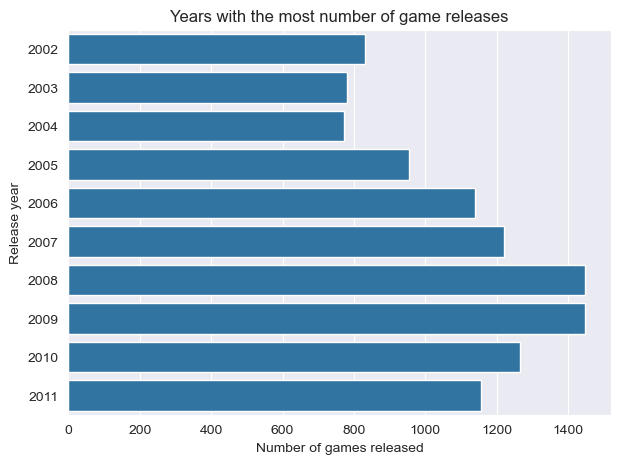

In [50]:
plt.figure(figsize=(7, 5))

sns.barplot(data=num_games_released_by_year, x='count_of_games_released', y='year_of_release', orient='h')
    
plt.xlabel('Number of games released')
plt.ylabel('Release year')
plt.title('Years with the most number of game releases')
plt.show()

Between 2002 to 2011 the most number of games were released. Logically, if the number of games released should influence the global sales considerably, they should be a steady rise in the total sales between 2002 and 2011. This implies that there are other factors at play here that determines the global sales, one of which we have seen to be the sales in the regions indicating regions with a wider player or user base.

However, the most number of games were released in 2008 and 2009. The same period where the global sales peaked for the first time in 4 decades. **Do ratings assigned to a game have a role to play here?**

In [51]:
ratings_globally = games2.groupby('rating')[['global_sales']].sum().reset_index()
ratings_globally = ratings_globally.sort_values(by='global_sales', ascending=False)
ratings_globally

,rating,global_sales
8,missing,2848.73
1,E,2436.61
7,T,1494.40
5,M,1473.84
2,E10+,655.81
4,K-A,4.33
0,AO,1.95
3,EC,1.78
6,RP,0.08


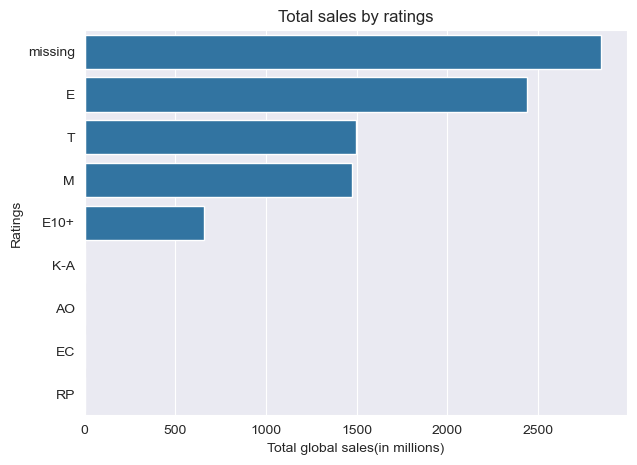

In [52]:
plt.figure(figsize=(7, 5))

sns.barplot(data=ratings_globally, x='global_sales', y='rating', orient='h')
    
plt.xlabel('Total global sales(in millions)')
plt.ylabel('Ratings')
plt.title('Total sales by ratings')
plt.show()

There is a huge chunk of games left uncounted for based on ratings. It so happens that this missing rating segment returned the most sales. 

Following that, we see that on a global level, games designed for everyone (E) was more popular amongst users. This is then followed almost equally by the games for teens and matured segments. However, **what does this look like for several regions? What game ratings are the most favoured by the different regions?**

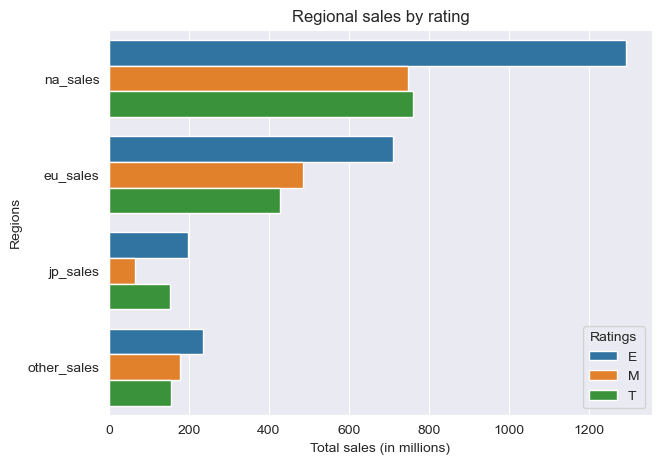

In [53]:
regional_sales_by_ratings = games2.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
regional_sales_by_ratings = regional_sales_by_ratings[regional_sales_by_ratings['rating'].isin(['E', 'T', 'M', 'E10'])]
melted_sales = regional_sales_by_ratings.melt(id_vars='rating', var_name='region', value_name='sales')
melted_sales.head()

plt.figure(figsize=(7, 5))

sns.barplot(data=melted_sales, x='sales', y='region', hue='rating')
plt.title('Regional sales by rating')
plt.ylabel('Regions')
plt.xlabel('Total sales (in millions)')
plt.legend(title='Ratings')
plt.show()

Generally, each region favours games designed for everyone, followed by those designed for matured individuals (17 years and older). There are a few exceptions as well. For instance, Japan favours Teen (13 years and older) designed games well above games for matured minds.

### 4. Is there a correlation between critic scores and user scores? Do they tend to agree or disagree?

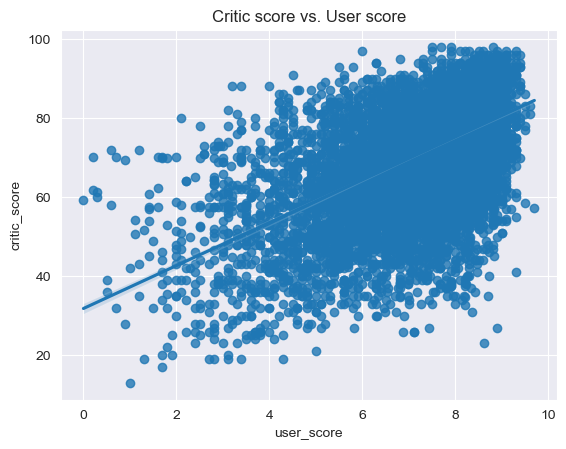

In [54]:
sns.regplot(data=num_df, x='user_score', y='critic_score', fit_reg=True)
plt.title('Critic score vs. User score')
plt.show()

The heatmap created earlier revealed a correlation score of 0.5. Based on that and the plot above, we can say that there is a moderate positive linear association between the user score and the critic score. What does this mean?

This means that there is a noticeable trend between the critic scores and the user scores, even though it is not a perfect relationship. It also tells us that professional critics and users tend to agree to some extent on their assessment of video games. Therefore, stakeholders need to consider both critic and user scores when making decisions about game development and marketing. 

While the 0.5 correlation is informative, there is the possibility that other factors may influece scores independently or interactively. 

#### Let's see if there has been a change in the user score and critic score over time

In [55]:
from sklearn.preprocessing import MinMaxScaler

#to convert both variables to the same scale
scaler_user = MinMaxScaler()
scaler_critic = MinMaxScaler()

#calculating the average user and critic scores by year
scores_by_year = num_df.groupby('year_of_release')[['user_score', 'critic_score']].mean()
scores_by_year = scores_by_year.reset_index()

scores_by_year['user_score'] = scaler_user.fit_transform(scores_by_year[['user_score']])
scores_by_year['critic_score'] = scaler_critic.fit_transform(scores_by_year[['critic_score']])

scores_by_year.head()

,year_of_release,user_score,critic_score
0,1980,0.09762,0.366125
1,1981,0.09762,0.366125
2,1982,0.09762,0.366125
3,1983,0.09762,0.366125
4,1984,0.09762,0.366125


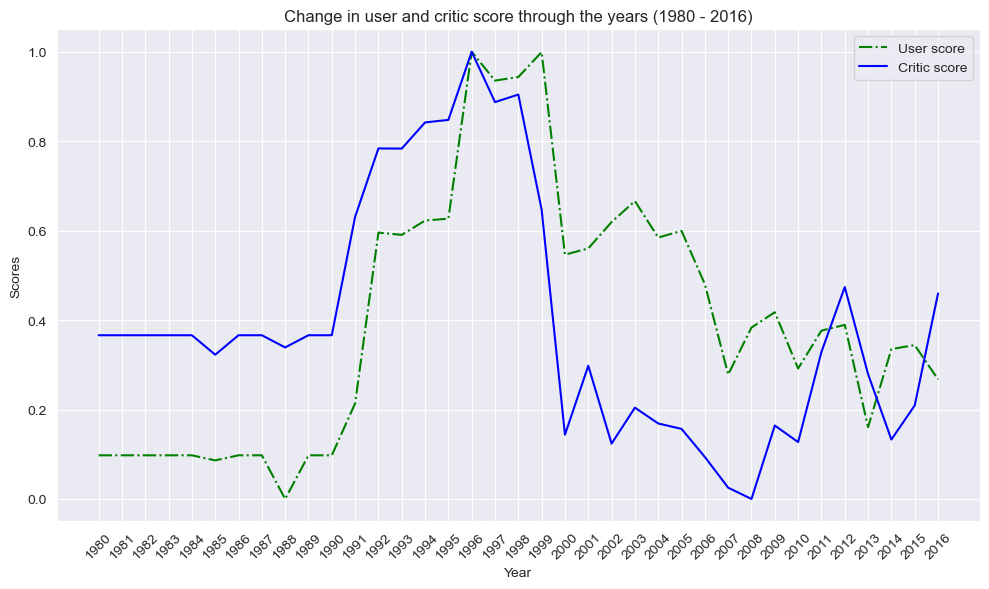

In [56]:
plt.figure(figsize=(10, 6))

#plotting the lines
plt.plot(scores_by_year['year_of_release'], scores_by_year['user_score'], color='green', linestyle='-.', label='User score')
plt.plot(scores_by_year['year_of_release'], scores_by_year['critic_score'], color='blue', linestyle='-', label='Critic score')

plt.xlabel('Year')
plt.ylabel('Scores')
plt.title('Change in user and critic score through the years (1980 - 2016)')
plt.legend()
years = range(1980, 2017)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

This shows how the scores allocated by the users and critics have changed over time. For a decade - 1980 to 1990 - users and critics had really low opinions of the games released within that time. But this changed in 1990 where we see a gradual change and rise in the scores by the critics and users. In 1996, the critics and users for the first time had similar opinions of the games released that year on average. However, this changed after 1996 with the user's opinions of games plumetting to an all time low in 2013 while critic scores on average increased once more after a dip in 2008.

### 5. What were the highest selling games released each year?

In [57]:
idx = games2.groupby('year_of_release')['global_sales'].idxmax()
gam_grouped = games2.loc[idx, ['year_of_release', 'name', 'global_sales']].reset_index()
gam_grouped.head()

,index,year_of_release,name,global_sales
0,262,1980,Asteroids,4.31
1,240,1981,Pitfall!,4.50
2,89,1982,Pac-Man,7.81
3,426,1983,Baseball,3.20
4,9,1984,Duck Hunt,28.31


In [58]:
#grouping the data
gam_grouped = gam_grouped.drop(['index'], axis =1)

#### What games have brought in the most sales so far?

In [60]:
gam_grouped2 = gam_grouped.sort_values(by='global_sales', ascending=False).head()
gam_grouped2

,year_of_release,name,global_sales
26,2006,Wii Sports,82.53
5,1985,Super Mario Bros.,40.24
28,2008,Mario Kart Wii,35.52
29,2009,Wii Sports Resort,32.77
16,1996,Pokemon Red/Pokemon Blue,31.37


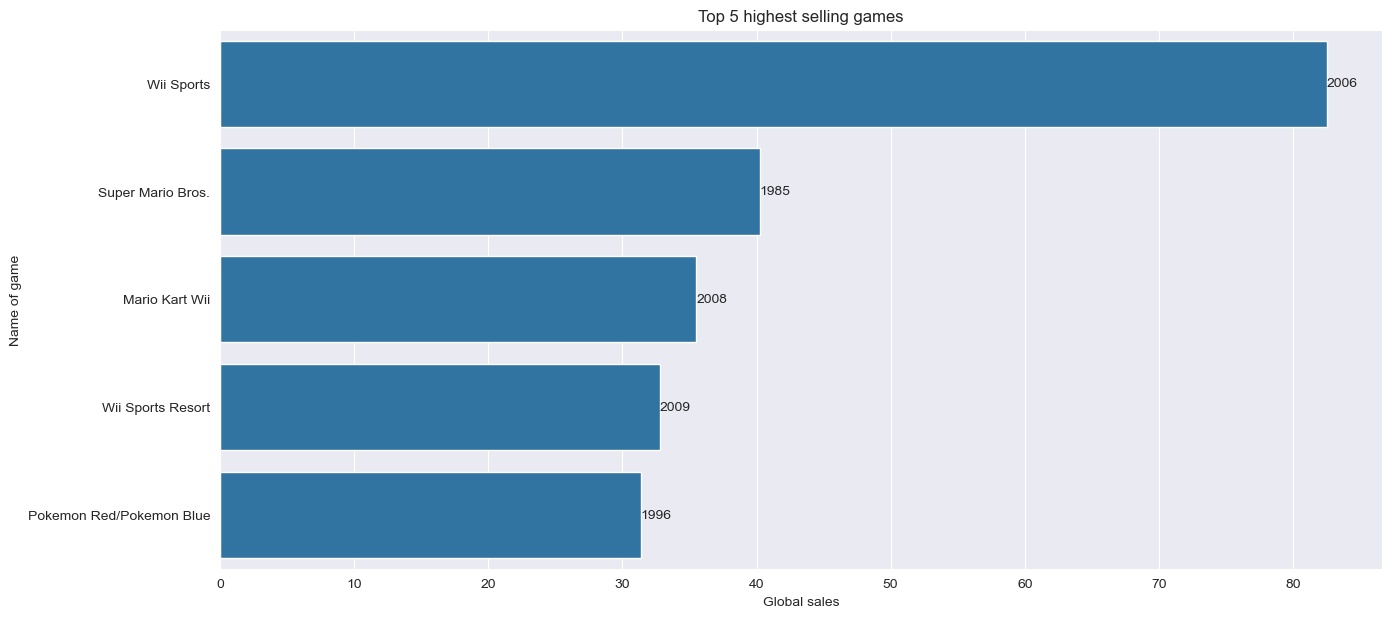

In [61]:
plt.figure(figsize=(15, 7))

sns.barplot(data=gam_grouped2, y='name', x='global_sales')

for index in range(len(gam_grouped2)):
    value = gam_grouped2.iloc[index]['global_sales']
    year = gam_grouped2.iloc[index]['year_of_release']
    plt.text(value, index, str(year), va='center')
    
plt.xlabel('Global sales')
plt.ylabel('Name of game')
plt.title('Top 5 highest selling games')
plt.show()

The plot shows us the games that have returned the highest global sales since their release till 2016. Wii Sports released in 2006 garnered the top most sales at 82.53 million. The second on the list being Super Mario Bros is no where close to Wii Sports despite being released 21 years earlier in 1985. We can go further. **Next we take a look at the games that have grossed the highest since their release, decade-wise.**

In [62]:
#group the games into decades
first_decade = gam_grouped[gam_grouped['year_of_release']<=1989]
second_decade = gam_grouped[(gam_grouped['year_of_release']>=1990) & (gam_grouped['year_of_release']<=1999)]
third_decade = gam_grouped[(gam_grouped['year_of_release']>=2000) & (gam_grouped['year_of_release']<=2009)]
fourth_decade = gam_grouped[gam_grouped['year_of_release']>=2010]

second_decade

,year_of_release,name,global_sales
10,1990,Super Mario World,20.61
11,1991,The Legend of Zelda: A Link to the Past,4.61
12,1992,Super Mario Land 2: 6 Golden Coins,11.18
13,1993,Super Mario All-Stars,10.55
14,1994,Donkey Kong Country,9.30
15,1995,Donkey Kong Country 2: Diddy's Kong Quest,5.15
16,1996,Pokemon Red/Pokemon Blue,31.37
17,1997,Gran Turismo,10.95
18,1998,Pokémon Yellow: Special Pikachu Edition,14.64
19,1999,Pokemon Gold/Pokemon Silver,23.10


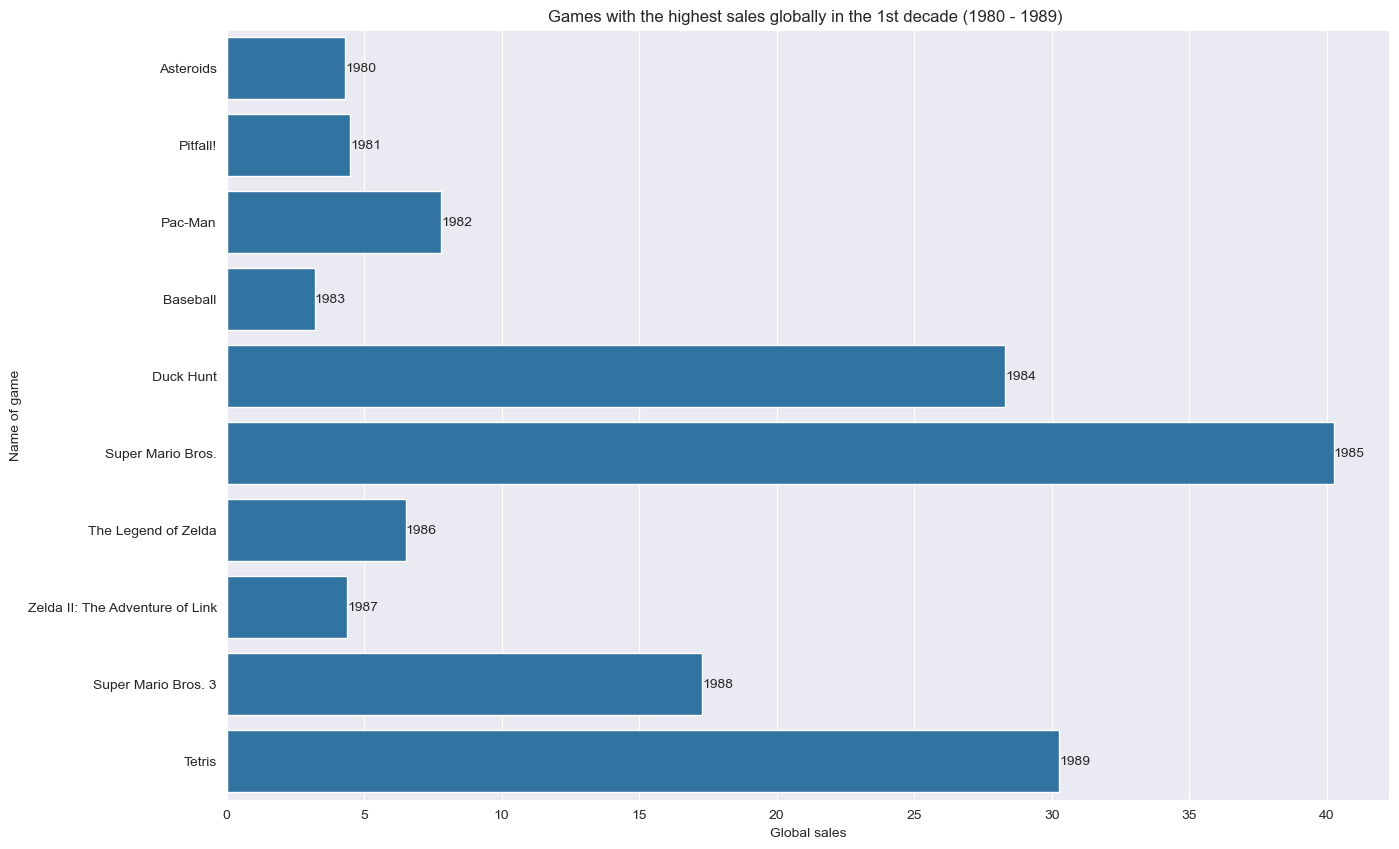

In [63]:
#the first decade
plt.figure(figsize=(15, 10))

sns.barplot(data=first_decade, x='global_sales', y='name', orient='h')

for index, value in enumerate(first_decade['global_sales']):
    plt.text(value, index, f"{first_decade['year_of_release'][index]}", va='center')
plt.xlabel('Global sales')
plt.ylabel('Name of game')
plt.title('Games with the highest sales globally in the 1st decade (1980 - 1989) ')
plt.show()

Between 1980 and 1989, Super Mario Bros released in 1985 has sold the most. The next in line is the Tetris game, closely followed by Duck Hunt.

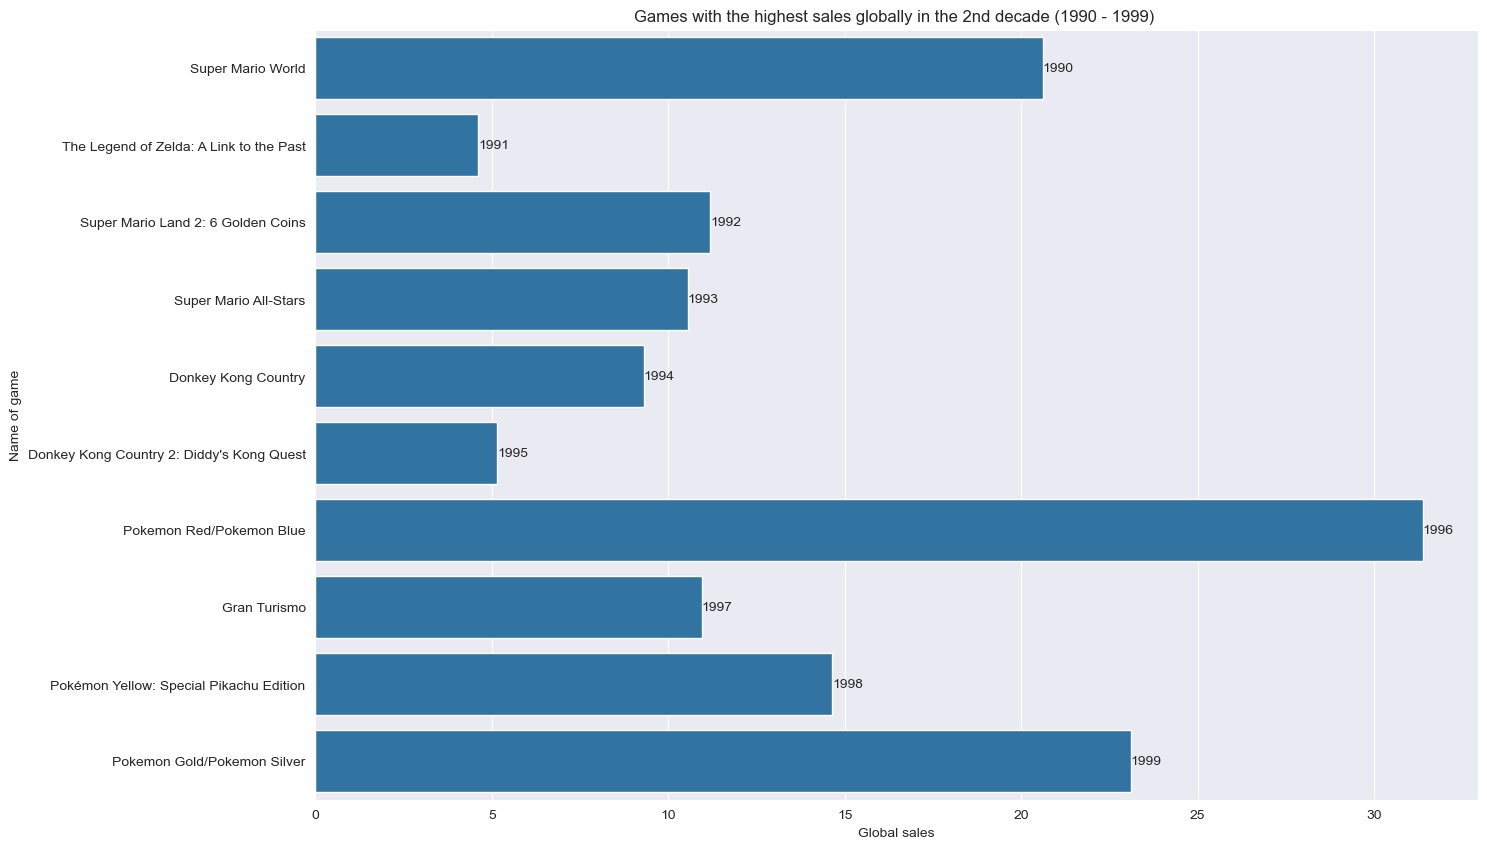

In [64]:
#second decade
plt.figure(figsize=(15, 10))

sns.barplot(data=second_decade, x='global_sales', y='name', orient='h')

for index in range(len(second_decade)):
    value = second_decade.iloc[index]['global_sales']
    year = second_decade.iloc[index]['year_of_release']
    plt.text(value, index, str(year), va='center')
    
plt.xlabel('Global sales')
plt.ylabel('Name of game')
plt.title('Games with the highest sales globally in the 2nd decade (1990 - 1999) ')
plt.show()

For games released in the second decade, 1996 Pokemon Red/Pokemon Blue is leading with over 30million sales while it's alternative in the Pokemon group games, Pokemon Gold/Pokemon Silver released three years later is trying to catch up at 23 million sales. 

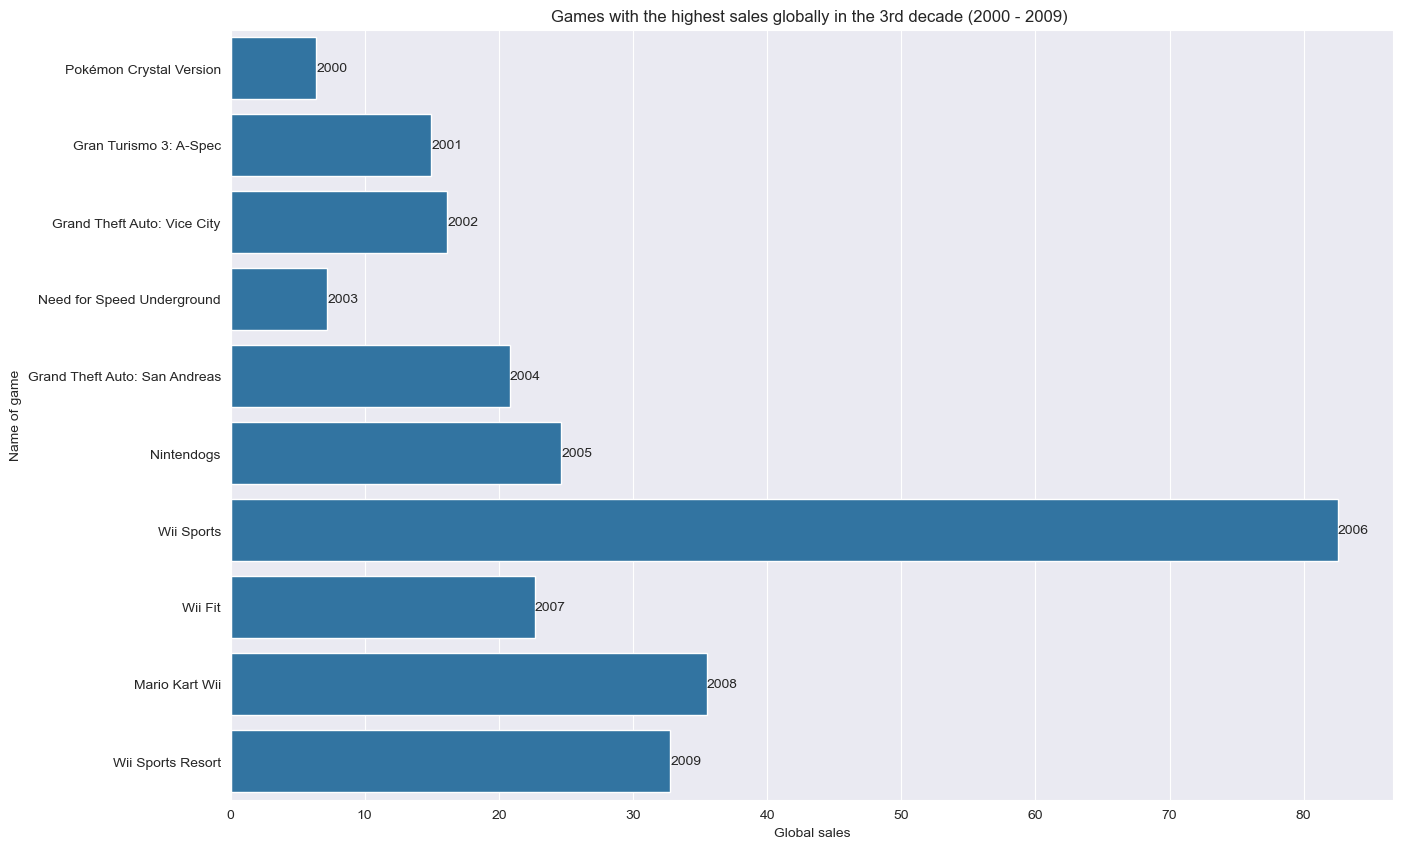

In [65]:
#third decade
plt.figure(figsize=(15, 10))

sns.barplot(data=third_decade, x='global_sales', y='name', orient='h')

for index in range(len(third_decade)):
    value = third_decade.iloc[index]['global_sales']
    year = third_decade.iloc[index]['year_of_release']
    plt.text(value, index, str(year), va='center')
    
plt.xlabel('Global sales')
plt.ylabel('Name of game')
plt.title('Games with the highest sales globally in the 3rd decade (2000 - 2009) ')
plt.show()

In the 3rd decade all other games are bested by Wii Sports with approximately 82 million sales. No other game released within this decade is close to this milestone. We can also see that the Mario Kart Wii game also brought in tangible amount of sales. The top three games in this decade were all published by Nintendo.

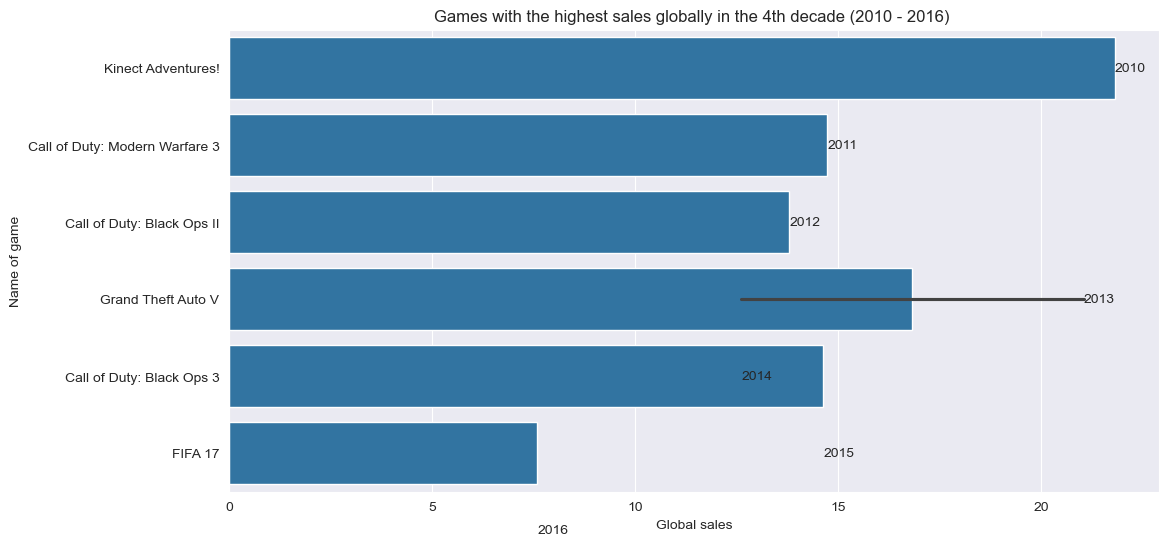

In [66]:
#fourth decade
plt.figure(figsize=(12, 6))

sns.barplot(data=fourth_decade, x='global_sales', y='name', orient='h')

for index in range(len(fourth_decade)):
    value = fourth_decade.iloc[index]['global_sales']
    year = fourth_decade.iloc[index]['year_of_release']
    plt.text(value, index, str(year), va='center')
    
plt.xlabel('Global sales')
plt.ylabel('Name of game')
plt.title('Games with the highest sales globally in the 4th decade (2010 - 2016) ')
plt.show()

For games released so far in the 4th decade, Kinect Adventures is the highest selling game seconded by Grand Theft Auto V released in 2013.

### 6. Which genre has the highest total sales globally? Are there regional variations in genre popularity?

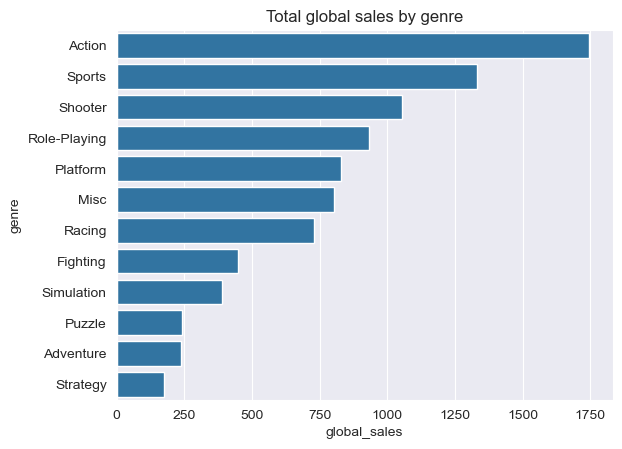

In [67]:
total_sales_by_genre = games2.groupby('genre')['global_sales'].sum().reset_index()
total_sales_by_genre = total_sales_by_genre.sort_values(by='global_sales', ascending=False)
sns.barplot(data= total_sales_by_genre, x='global_sales', y='genre')
plt.title('Total global sales by genre')
plt.show()

Globally, we can say that players favour Action and Sports based games. Because they favour these genres of games, it is evident in the amount of sales these genres contribute to the global sales. However, let's do an analysis based on genre and the respective regions.

In [68]:
regional_sales_by_genre = games2.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
regional_sales_by_genre.head()

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,879.01,519.13,161.43,184.60
1,Adventure,105.26,63.54,52.30,16.49
2,Fighting,223.36,100.33,87.48,36.36
3,Misc,407.27,212.74,108.11,74.39
4,Platform,445.50,200.35,130.83,51.09


In [69]:
melted_df = regional_sales_by_genre.melt(id_vars='genre', var_name='region', value_name='sales')
melted_df.head()

,genre,region,sales
0,Action,na_sales,879.01
1,Adventure,na_sales,105.26
2,Fighting,na_sales,223.36
3,Misc,na_sales,407.27
4,Platform,na_sales,445.50


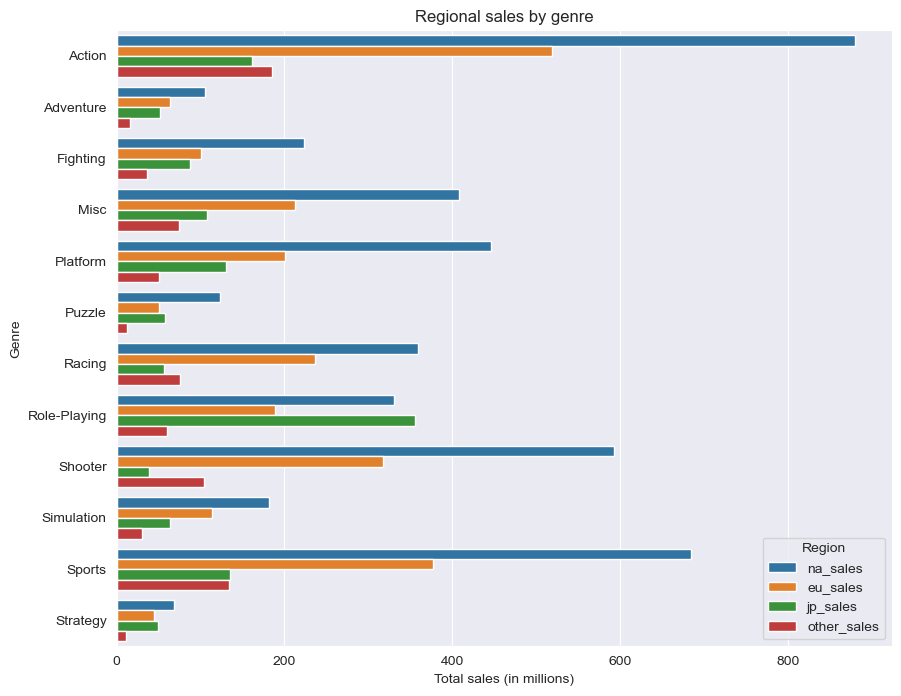

In [70]:
plt.figure(figsize=(10, 8))

sns.barplot(data=melted_df, x='sales', y='genre', hue='region')
plt.title('Regional sales by genre')
plt.ylabel('Genre')
plt.xlabel('Total sales (in millions)')
plt.legend(title='Region')
plt.show()

By now, we know that North America contributes the most amount in sales compared to other regions. This is again backed by the distribution of sales as seen the plot above, except in one case. For role-playing genre, we see that Japan beats North America to it. Japan favours role-playing games comapred to North America and Europe. 

### 7. Do certain genres receive consistently higher critic scores compared to others?

Here we want to know whether there is a pattern or trend in the video game industry where certain types or categories of games tend to receive better reviews from professional critics than others.

Are there specific genres that, on average, tend to receive higher scores from critics compared to others?

In [71]:
genre_critic_score = games2.groupby('genre')['critic_score'].agg(['mean', 'std']).reset_index()
genre_critic_score['mean'] = round(genre_critic_score['mean'], 1)
genre_critic_score['std'] = round(genre_critic_score['std'], 1)

genre_critic_score

,genre,mean,std
0,Action,69.4,12.2
1,Adventure,70.4,9.8
2,Fighting,73.1,12.5
3,Misc,70.2,10.0
4,Platform,70.9,11.9
5,Puzzle,71.1,10.5
6,Racing,70.8,13.1
7,Role-Playing,73.4,10.3
8,Shooter,71.7,13.6
9,Simulation,70.4,10.2


**Mean critic scores:**
Genres like Fighting, Role-Playing and Strategy have higher critic scores on average. This indicates that games in these genres generally receive more favorable reviews from critics.



**Standard deviation:**
Lower standard deviations as seen in the Adventure, Misc and Simulation categories suggest more consistency in critic scores within those genres while games with higher standard deviations like Shooter, Racing and Fighting have greater variability across games in those genres. 

### 8. What are the most popular video game consoles (platforms) and their best-selling games?

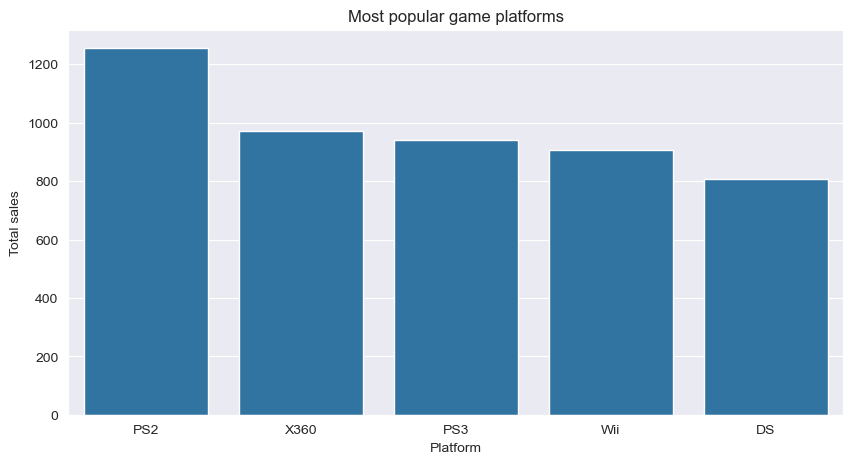

In [72]:
pop_plat = games2.groupby('platform')['global_sales'].sum().reset_index()
pop_plat = pop_plat[pop_plat['platform'] != 'Others']
pop_plat = pop_plat.sort_values(by='global_sales', ascending=False).head()

plt.figure(figsize=(10,5))
sns.barplot(data=pop_plat, y='global_sales', x='platform')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Most popular game platforms')
plt.show()

- **PS2(Playstation 2) and PS3**: created by Sony Interactive entertainment. PS2 was launched in year 2000 in Japan and North America while PS3 was launched later in 2006 in the same regions

- **X360(Xbox 360)**: owned by Microsoft and launched in 2005.

- **Wii and DS (Nintendo DS)** by Nintendo were launched in 2006 and 2004 respectively, both in North America.

The chart shows the five most popular gaming platforms in terms of total games sold between 1980 and 2016. Sony's PS2 takes the spotlight with over 1.2 billion games sold as of 2016. X360 by Microsoft comes in second place closely followed by another Sony owned platform the PS3 which is an update to the intial release PS2. Despite PS3 being an updated release, PS2 still garnered more sales. This can be due to the gap between the two releases or user preferences and satisfaction. In third and fourth place are Nintendo's platforms with 908 million and 806 million game sales.

**Next, we can look into the most popular games for each of these platforms.**

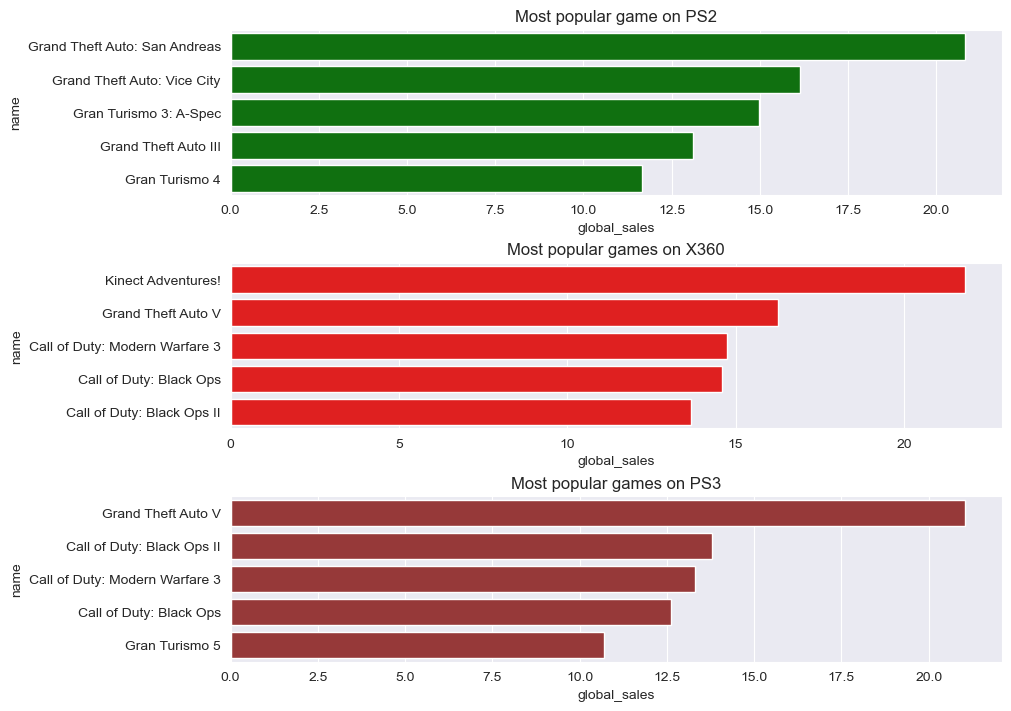

In [73]:
#for PS2
pop_plat1 = games2[games2['platform'] == 'PS2']
PS2=pop_plat1[['name', 'global_sales']]
PS2=PS2.sort_values(by='global_sales', ascending=False)
PS2 = PS2.head(5)

#for X360
pop_plat2 = games2[games2['platform'] == 'X360']
X360=pop_plat2[['name', 'global_sales']]
X360=X360.sort_values(by='global_sales', ascending=False)
X360 = X360.head(5)

#for PS3
pop_plat3 = games2[games2['platform'] == 'PS3']
PS3=pop_plat3[['name', 'global_sales']]
PS3=PS3.sort_values(by='global_sales', ascending=False)
PS3 = PS3.head(5)

#plotting the graphs
fig, axs = plt.subplots(3,1, figsize=(10, 7), layout = 'constrained')

axs[0].set_title('Most popular game on PS2')
sns.barplot(data=PS2, y='name', x='global_sales', color='green', ax=axs[0])

axs[1].set_title('Most popular games on X360')
sns.barplot(data=X360, y='name', x='global_sales', color='red', ax=axs[1])

axs[2].set_title('Most popular games on PS3')
sns.barplot(data=PS3, y='name', x='global_sales', color='brown', ax=axs[2])
plt.show()

The five best selling games for each of the three most popular gaming platforms is seen above. 

They all have similar distributions with the highest sales generally around 20 million.


This list is dominated majorly by three video  game franchises : **Grand Theft Auto, Call of Duty and Gran Turismo**. This means that across the top three gaming platforms that drive the most sales, these games are a favorite amongst the gaming population or users. We can also say that Sony and Microsoft consoles are used pretty much for playing the same kind of games, and what therefore differentiates one from the other is the processing speed and performance.

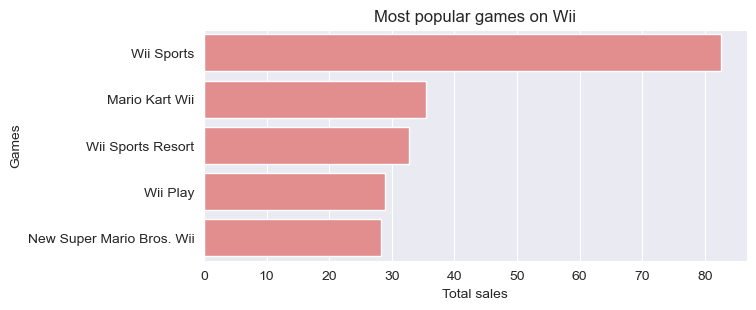

In [74]:
#for Wii
pop_plat4 = games2[games2['platform'] == 'Wii']
Wii=pop_plat4[['name', 'global_sales']]
Wii=Wii.sort_values(by='global_sales', ascending=False)
Wii = Wii.head(5)

plt.figure(figsize=(7,3))
sns.barplot(data=Wii, y='name', x='global_sales', color='lightcoral' )
plt.xlabel('Total sales')
plt.ylabel('Games')
plt.title('Most popular games on Wii')
plt.show()

All is well and good until we come to the fourth most popular platform - Wii. 

Wii arrived in 2006 after Nintendo have been in the wilderness for half a decade. Wii sports was shipped with the Wii platform itself. It also helped to quickly cemented the place of its host platform (Wii) in the consciousness of the public and went on to be the best selling Nintendo game of all time.

From the chart we can see it bags the highest sales of over 80 million copies. This is four times the sales numbers for any of the top games for PS2, PS3 and X360.

We also observe that none of the three giant video game giants are featured on the Wii console, instead the Wii console is made up entirely of Nintendo's own releases and Wii exclusives. 

In the chart below, we see its a similar case with Nintendo's DS featuring Nintendo's exlusives.

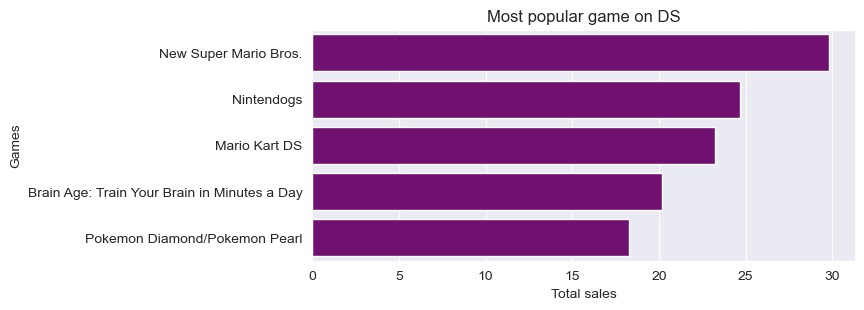

In [75]:
#for DS
pop_plat5 = games2[games2['platform'] == 'DS']
DS = pop_plat5[['name', 'global_sales']]
DS = DS.sort_values(by='global_sales', ascending=False)
DS = DS.head(5)

plt.figure(figsize=(7,3))
sns.barplot(data=DS, y='name', x='global_sales', color='purple' )
plt.xlabel('Total sales')
plt.ylabel('Games')
plt.title('Most popular game on DS')
plt.show()

### 9. Do critics and regular users prefer different games on average?

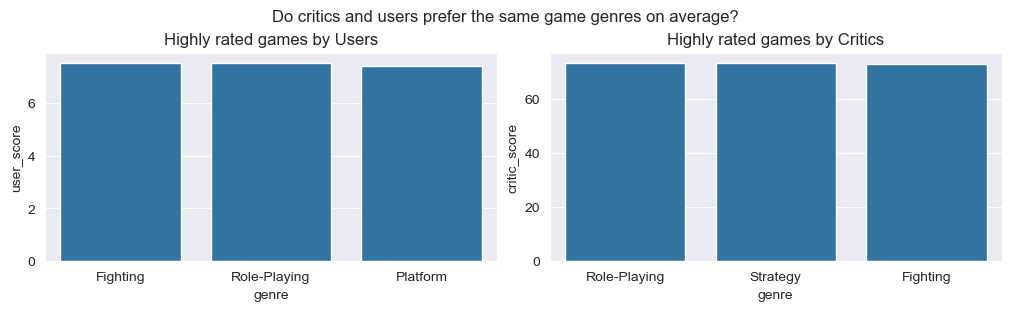

In [76]:
#users
user_df = games2.groupby('genre')['user_score'].mean().reset_index()
user_df['user_score'] = user_df['user_score'].round(1)
user_df = user_df.sort_values(by='user_score', ascending=False)
user_df = user_df.head(3)


#critis
critic_df = games2.groupby('genre')['critic_score'].mean().reset_index()
critic_df['critic_score'] = critic_df['critic_score'].round(1)
critic_df = critic_df.sort_values(by='critic_score', ascending=False)
critic_df = critic_df.head(3)
critic_df

##plotting
fig, axs = plt.subplots(1, 2, figsize=(10,3), layout='constrained')
plt.suptitle('Do critics and users prefer the same game genres on average?')

axs[0].set_title('Highly rated games by Users')
sns.barplot(data= user_df, x='genre', y='user_score', ax= axs[0])

axs[1].set_title('Highly rated games by Critics')
sns.barplot(data= critic_df, x='genre', y='critic_score', ax=axs[1])

plt.show()

The first plot shows the top three highly rated game genres by users. On average users preferred fighting, role-playing and platform games (in that order). Can we say same for the critics? On the right hand side, we discover that critics very well prefer Role playing, Strategy and Fighting games compared to the other genre of games they review on average. Do they however prefer the same genres as the users? On a global scale, critics and users are seen to favour Role-playing and Fighting games compared to others. 

### 10. What is the player base  for the game genres like? Is it different for the critics? What genres have the most number of critics review it?

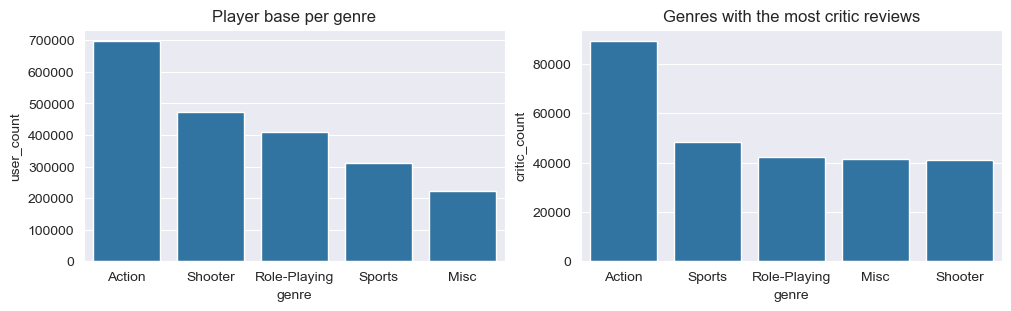

In [77]:
#users
user_df1 = games2.groupby('genre')['user_count'].sum().reset_index()
user_df1['user_count'] = user_df1['user_count'].round(1)
user_df1 = user_df1.sort_values(by='user_count', ascending=False)
user_df1 = user_df1.head(5)


#critis
critic_df1 = games2.groupby('genre')['critic_count'].sum().reset_index()
critic_df1['critic_count'] = critic_df1['critic_count'].round(1)
critic_df1 = critic_df1.sort_values(by='critic_count', ascending=False)
critic_df1 = critic_df1.head(5)
critic_df1

##plotting
fig, axs = plt.subplots(1, 2, figsize=(10,3), layout='constrained')
#plt.suptitle('Do critics and users prefer the same game genres on average?')

axs[0].set_title('Player base per genre')
sns.barplot(data= user_df1, x='genre', y='user_count', ax= axs[0])

axs[1].set_title('Genres with the most critic reviews')
sns.barplot(data= critic_df1, x='genre', y='critic_count', ax=axs[1])

plt.show()

Most players favour action, shooter or role-playing games compared to the others. Action games are leading the table with 700,000 users. Shooter games amount to 480,000 users and role-playing takes third place with 400,000 users. This top 5 games by user counts shows us the game genres users are more likely to go for. What do the critics have to say about this? Action games being popular among users can be said to draw the attention of more critics to review the games in that genre. Second to this are Sports games and finally role-playing games again.

### ACTIONABLE INSIGHTS

What does all our exploratory data analysis tell us? Where do we go from here? What can we do with this information?

`For stakeholders looking to bring a new game into the market:`

**1. North America is a major player in the gaming industry. To capture and drive more sales globally, we need to penetrate the market there and garner as much user/fan base and positive reviews needed to skyrocket sales.**

**2. Choice of game genre**

- Action games are considered the most poular genre of all times, globally. In Japan, however, we may want to focus on role-playing games in order to leverage Japan's preference for this genre to drive sales from that region.
- Based on reviews, critics and users prefer Role-playing and fighting games, however, action, shooter and role-playing games have a larger fan base.

For a new game release, we can consider buiding a game that belongs to any of the following categories - Action, or Role-playing to drive more sales globally.

**3. Game acceptability (ratings)**

It is recommended that games should be designed for either E(Everyone), T(Teens ==> 13 years and older) or M ( Mature ==> 17 years and older) to reach more users. This would also impact the return in sales as more people can access the games released by virtue of the games suitability with the audience.

**4. Platform**

PS2, X360 and PS3 are household names known to gamers and users globally. In the past four decades these platforms have contributed the most to global sales. It is recommended that a new game to be released, use any of these platforms in order to leverage the familarity of these platforms with the users to drive sales. 

**5. Investigate the distribution of users in each region in order to gauge the receptivity of these games in the respective regions**

**6. Carry out a comparative analysis on the performance of games from the point of release till date.**